## **Single layer Perceptron from scratch**

References: https://www.pycodemates.com/2022/12/perceptron-algorithm-understanding-and-implementation-python.html#google_vignette

AND

In [6]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0  # Step function

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_predicted = self.activation(linear_output)

                # Update weights and bias
                self.weights += self.learning_rate * (y[i] - y_predicted) * X[i]
                self.bias += self.learning_rate * (y[i] - y_predicted)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.array([self.activation(output) for output in linear_output])
        return y_predicted

# AND gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

# Predictions
predictions = perceptron.predict(X)

print("Predictions:", predictions)


Predictions: [0 0 0 1]


OR

In [7]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0  # Step function

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_predicted = self.activation(linear_output)

                # Update weights and bias
                self.weights += self.learning_rate * (y[i] - y_predicted) * X[i]
                self.bias += self.learning_rate * (y[i] - y_predicted)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.array([self.activation(output) for output in linear_output])
        return y_predicted

# AND gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

# Predictions
predictions = perceptron.predict(X)

print("Predictions:", predictions)


Predictions: [0 1 1 1]


XOR

In [8]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0  # Step function

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_predicted = self.activation(linear_output)

                # Update weights and bias
                self.weights += self.learning_rate * (y[i] - y_predicted) * X[i]
                self.bias += self.learning_rate * (y[i] - y_predicted)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.array([self.activation(output) for output in linear_output])
        return y_predicted

# AND gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

# Predictions
predictions = perceptron.predict(X)

print("Predictions:", predictions)


Predictions: [1 1 0 0]


# **Multilayer Perceptron with one hidden layer from scratch**

References:

https://github.com/KirillShmilovich/MLP-Neural-Network-From-Scratch/blob/master/MLP.ipynb

https://www.kaggle.com/code/vitorgamalemos/multilayer-perceptron-from-scratch

XOR

In [9]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize the neural network with given input, hidden, and output layer sizes
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases randomly
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden_output = np.zeros((1, output_size))

    def activation(self, x):
        # Define the activation function (binary step function)
        return np.where(x > 0, 1, 0)

    def forward(self, X):
        # Perform forward pass through the network
        # Calculate hidden layer output
        self.hidden_output = self.activation(np.dot(X, self.weights_input_hidden) + self.bias_input_hidden)
        # Calculate predicted output
        self.predicted_output = self.activation(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output)
        return self.predicted_output

    def backward(self, X, y, learning_rate):
        # Perform backward pass through the network (backpropagation)
        # Calculate error
        error = y - self.predicted_output
        # Calculate gradients
        d_predicted_output = error
        error_hidden = d_predicted_output.dot(self.weights_hidden_output.T)
        d_hidden_output = error_hidden

        # Update weights and biases using gradient descent
        self.weights_hidden_output += self.hidden_output.T.dot(d_predicted_output) * learning_rate
        self.bias_hidden_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(d_hidden_output) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden_output, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        # Train the neural network using the given data and hyperparameters
        for _ in range(epochs):
            # Forward pass
            self.forward(X)
            # Backward pass
            self.backward(X, y, learning_rate)

# Example usage:
if __name__ == "__main__":
    # Example dataset (binary classification)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Define and train the neural network
    input_size = 2
    hidden_size = 4
    output_size = 1
    epochs = 10000
    learning_rate = 0.1

    model = NeuralNetwork(input_size, hidden_size, output_size)
    model.train(X, y, epochs, learning_rate)

    # Test the trained model
    test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    print("Predictions:")
    print(model.forward(test_input))


Predictions:
[[0]
 [0]
 [0]
 [0]]


# **Perceptron using the built-in library for diabetes dataset**


In [14]:
import pandas as pd

data = pd.read_csv('/content/diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


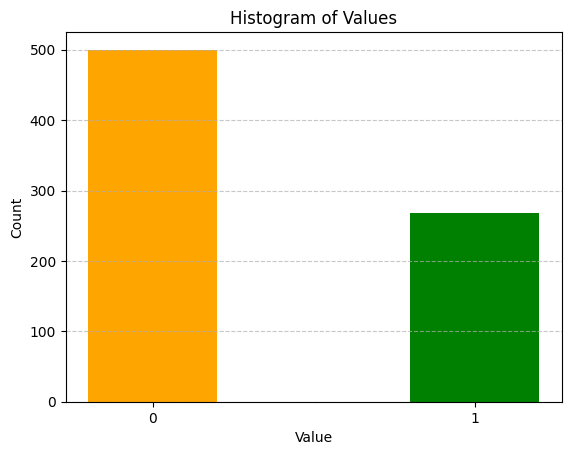

In [44]:
# Count the occurrences of each value in the column
value_counts = data['Outcome'].value_counts()
import matplotlib.pyplot as plt
# Plot histogram
plt.bar(value_counts.index, value_counts.values, color=['orange', 'green'], width=0.4)

# Customize plot
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(value_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

**Single layer perceptron**

In [47]:
!pip install scikit-learn

In [50]:
from sklearn.linear_model import Perceptron
X = data.iloc[:-1, :-1]  # Exclude the last row and the last column
y = data.iloc[:-1, -1]   # Exclude the last row

# Split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sk_perceptron = Perceptron()
sk_perceptron.fit(X_train, y_train)
sk_perceptron_pred = sk_perceptron.predict(X_test)

# Accuracy

from sklearn.metrics import accuracy_score
accuracy_score(sk_perceptron_pred, y_test)

0.5974025974025974

In [51]:
from sklearn.metrics import classification_report

report = classification_report(sk_perceptron_pred, y_test, digits=2)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        83
           1       0.59      0.42      0.49        71

    accuracy                           0.60       154
   macro avg       0.60      0.58      0.58       154
weighted avg       0.60      0.60      0.59       154



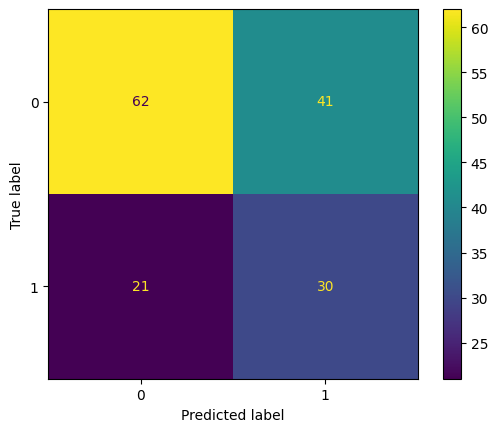

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, sk_perceptron_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Multi Layer Perceptron**

References:
https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/


In [53]:
import tensorflow as t
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as pt

In [54]:
X = data.iloc[:-1, :-1]  # Exclude the last row and the last column
y = data.iloc[:-1, -1]   # Exclude the last row

# Split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = Sequential([

    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(),

      # dense layer 1
    Dense(256, activation='sigmoid'),

    # dense layer 2
    Dense(32, activation='sigmoid'),

      # output layer
    Dense(10, activation='sigmoid'),   ])

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
model.fit(X_train, y_train, epochs=50,
          batch_size=2000,
          validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 1s 889ms/step - loss: 2.2057 - accuracy: 0.0000e+00 - val_loss: 2.1249 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 37ms/step - loss: 2.0753 - accuracy: 0.0000e+00 - val_loss: 2.0011 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 37ms/step - loss: 1.9509 - accuracy: 0.0122 - val_loss: 1.8844 - val_accuracy: 0.3902
Epoch 4/50
1/1 [==============================] - 0s 37ms/step - loss: 1.8337 - accuracy: 0.4000 - val_loss: 1.7756 - val_accuracy: 0.6098
Epoch 5/50
1/1 [==============================] - 0s 41ms/step - loss: 1.7247 - accuracy: 0.6551 - val_loss: 1.6754 - val_accuracy: 0.6098
Epoch 6/50
1/1 [==============================] - 0s 61ms/step - loss: 1.6245 - accuracy: 0.6551 - val_loss: 1.5842 - val_accuracy: 0.6098
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 1.5334 - accuracy: 0.6551 - val_loss: 1.5017 - val_accuracy: 0.6098
Epoch 8/50

In [58]:
results = model.evaluate(X_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.7209042906761169, 0.6688311696052551]
